In [ ]:
import torch
import torch.nn as nn
from tqdm import *
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
step=3000
batch_size=80
learn_rating=0.001

In [ ]:
input_x=[]
input_y=[]
with open("./drive/MyDrive/ml/lab4/ex4x.dat",'r')as f:
  for input in f.readlines():
    #print(input)
    input=input.replace('\n','')
    input=input.split(' ')
    #print(input[3],input[6])
    linshi=[float(input[3]),float(input[6]),1]
    input_x.append(linshi)
with open("./drive/MyDrive/ml/lab4/ex4y.dat",'r')as f:
  for input in f.readlines():
    #print(input)
    input=input.replace('\n','')
    #print(float(input))
    linshi=[float(input)]
    input_y.append(linshi)
print(input_x)
print(input_y)

[[55.5, 69.5, 1], [41.0, 81.5, 1], [53.5, 86.0, 1], [46.0, 84.0, 1], [41.0, 73.5, 1], [51.5, 69.0, 1], [51.0, 62.5, 1], [42.0, 75.0, 1], [53.5, 83.0, 1], [57.5, 71.0, 1], [42.5, 72.5, 1], [41.0, 80.0, 1], [46.0, 82.0, 1], [46.0, 60.5, 1], [49.5, 76.0, 1], [41.0, 76.0, 1], [48.5, 72.5, 1], [51.5, 82.5, 1], [44.5, 70.5, 1], [44.0, 66.0, 1], [33.0, 76.5, 1], [33.5, 78.5, 1], [31.5, 72.0, 1], [33.0, 81.5, 1], [42.0, 59.5, 1], [30.0, 64.0, 1], [61.0, 45.0, 1], [49.0, 79.0, 1], [26.5, 64.5, 1], [34.0, 71.5, 1], [42.0, 83.5, 1], [29.5, 74.5, 1], [39.5, 70.0, 1], [51.5, 66.0, 1], [41.5, 71.5, 1], [42.5, 79.5, 1], [35.0, 59.5, 1], [38.5, 73.5, 1], [32.0, 81.5, 1], [46.0, 60.5, 1], [36.5, 53.0, 1], [36.5, 53.5, 1], [24.0, 60.5, 1], [19.0, 57.5, 1], [34.5, 60.0, 1], [37.5, 64.5, 1], [35.5, 51.0, 1], [37.0, 50.5, 1], [21.5, 42.0, 1], [35.5, 58.5, 1], [26.5, 68.5, 1], [26.5, 55.5, 1], [18.5, 67.0, 1], [40.0, 67.0, 1], [32.5, 71.5, 1], [39.0, 71.5, 1], [43.0, 55.5, 1], [22.0, 54.0, 1], [36.0, 62.5, 

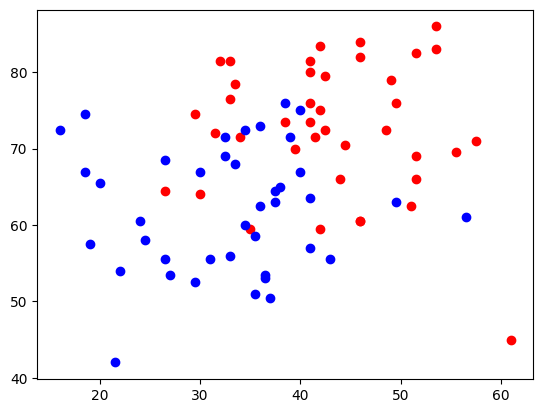

In [ ]:
for i in range(len(input_x)):
  if input_y[i][0]==1.0:
    plt.scatter(input_x[i][0],input_x[i][1],c='red')
  else:
    plt.scatter(input_x[i][0],input_x[i][1],c='blue')
plt.show()

In [ ]:
class Logistic_Module(nn.Module):
  def __init__(self):
    super(Logistic_Module,self).__init__()
    self.m=nn.Parameter(torch.rand((3,1)))
    #self.m=nn.Parameter(torch.tensor([0.,0.,0.]))
    self.sigmod=torch.nn.Sigmoid()
  def forward(self,x):
    mid_step=x@self.m
    #print(mid_step)
    y=self.sigmod(mid_step)
    return y

In [ ]:
model=Logistic_Module()
optimizer=torch.optim.SGD(model.parameters(),lr=learn_rating)

In [ ]:
#def gradient(y,y_predict):

  #return ((y_predict-y)**2).mean()/2

In [ ]:
def get_gradient(y_predict,y,input_x):
  linshi=y_predict-y
  #end_ans=np.array((int(y.size()[0]),int(input_x.size()[1])))
  end_ans=torch.rand((int(y.size()[0]),int(input_x.size()[1])),requires_grad=False)
  for i in range(y.size()[0]):
    end_ans[i][0]=linshi[i][0]*input_x[i][0]
    end_ans[i][1]=linshi[i][0]*input_x[i][1]
  end_ans=torch.mean(end_ans,dim=0)
  end_ans=end_ans.reshape(3,1)
  return end_ans
  #print(input_x)
  #return (y_predict-y)*input_x
  #return (y_predict-y).mean()

In [ ]:
def loss(y,y_predict):
  #end_ans=(y_predict-y)**2
  #mid_m=torch.ones((batch_size,1),requires_grad=False)
  #end_ans=-y*torch.log(y_predict)-(mid_m-y)*torch.log(mid_m-y_predict)
  #print(end_ans)
  #print(y.size(),y_predict.size())
  return ((y_predict-y)**2).mean()

In [ ]:
biao_x=[]
biao_y=[]

In [ ]:
for i in tqdm(range(step)):
  end_input=torch.rand((batch_size,len(input_x[0])),requires_grad=False)
  output_true=torch.rand((batch_size,len(input_y[0])),requires_grad=False)
  for j in range(batch_size):
    id=j
    for k in range(len(input_x[id])):
      end_input[j][k]=input_x[id][k]
    for k in range(len(input_y[id])):
      output_true[j][k]=input_y[id][k]
  output_predict=model(end_input)
  #print(output_predict.size()[1])
  l=get_gradient(output_predict,output_true,end_input)
  #print(l)
  #print(learn_rating*l*model.m)
  model.m=nn.Parameter(model.m-learn_rating*l)
  biao_x.append(i)
  biao_y.append(loss(output_true,output_predict).item())
  if i%1000==0:
    print(l)
    print(model.m)

  0%|          | 13/3000 [00:00<00:23, 125.86it/s]

tensor([[-0.0030],
        [-0.0055],
        [ 0.5300]], grad_fn=<ReshapeAliasBackward0>)
Parameter containing:
tensor([[ 0.0834],
        [ 0.0592],
        [-7.0752]], requires_grad=True)


 34%|███▎      | 1012/3000 [00:10<00:26, 74.41it/s]

tensor([[-0.0035],
        [-0.0062],
        [ 0.5077]], grad_fn=<ReshapeAliasBackward0>)
Parameter containing:
tensor([[ 0.0865],
        [ 0.0648],
        [-7.5757]], requires_grad=True)


 67%|██████▋   | 2014/3000 [00:26<00:14, 65.87it/s]

tensor([[-0.0031],
        [-0.0054],
        [ 0.5016]], grad_fn=<ReshapeAliasBackward0>)
Parameter containing:
tensor([[ 0.0897],
        [ 0.0703],
        [-8.0769]], requires_grad=True)


100%|██████████| 3000/3000 [00:35<00:00, 83.34it/s]


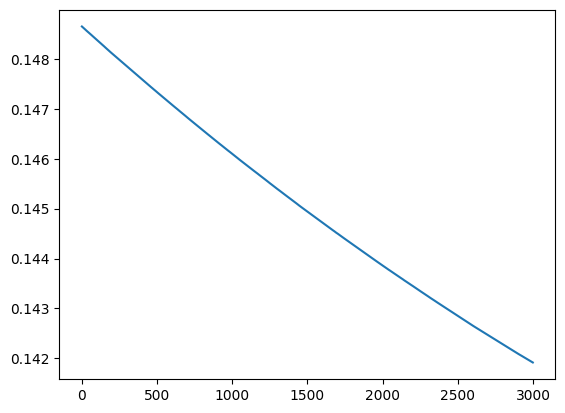

In [ ]:
plt.plot(biao_x,biao_y)
plt.show()

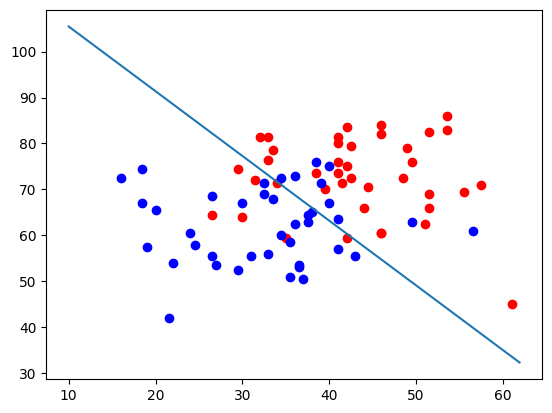

In [ ]:

x=[]
y=[]
for i in np.arange(10,62,0.1):
  x.append(i)
  y.append((0-model.m[2][0].item()-model.m[0][0].item()*i)/model.m[1][0].item())
for i in range(len(input_x)):
  if input_y[i][0]==1.0:
    plt.scatter(input_x[i][0],input_x[i][1],c='red')
  else:
    plt.scatter(input_x[i][0],input_x[i][1],c='blue')
plt.plot(x,y)
plt.show()

In [ ]:
one=torch.tensor([[20.],[80.],[1.]])
print(torch.transpose(one,1,0))
print(model(torch.transpose(one,1,0)))

tensor([[20., 80.,  1.]])
tensor([[0.3424]], grad_fn=<SigmoidBackward0>)
